In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, RandomRotation, RandomFlip, RandomContrast, Rescaling, Input, Activation
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)
keras.utils.set_random_seed(19)

In [ ]:

!wget https://github.com/Taker-7/gun2/archive/refs/heads/main.zip
!rm -rf data
!unzip "main.zip" -d .


--2024-06-18 00:06:55--  https://github.com/Taker-7/gun2/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Taker-7/gun2/zip/refs/heads/main [following]
--2024-06-18 00:06:55--  https://codeload.github.com/Taker-7/gun2/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [           <=>      ]  94.77M  26.2MB/s    in 3.6s    

2024-06-18 00:06:59 (26.2 MB/s) - ‘main.zip’ saved [99369819]

Archive:  main.zip
8b6132a9904692853ea799c67e04fbe602533cc3
   creating: ./gun2-main/
  inflating: ./gun2-main/LICENSE     
  inflating: ./gun2-main/recognizer_version1

In [ ]:
!unzip "./gun2-main/val_rndm.zip" -d ./data
!unzip "./gun2-main/test_rndm.zip" -d ./data

Archive:  ./gun2-main/val_rndm.zip
   creating: ./data/val_rndm/
   creating: ./data/val_rndm/ak47/
  inflating: ./data/val_rndm/ak47/ak47.1.jpg  
  inflating: ./data/val_rndm/ak47/ak47.111.jpg  
  inflating: ./data/val_rndm/ak47/ak47.113.jpg  
  inflating: ./data/val_rndm/ak47/ak47.116.jpg  
  inflating: ./data/val_rndm/ak47/ak47.117.jpg  
  inflating: ./data/val_rndm/ak47/ak47.121.jpg  
  inflating: ./data/val_rndm/ak47/ak47.122.jpg  
  inflating: ./data/val_rndm/ak47/ak47.125.jpg  
  inflating: ./data/val_rndm/ak47/ak47.126.jpg  
  inflating: ./data/val_rndm/ak47/ak47.139.jpg  
  inflating: ./data/val_rndm/ak47/ak47.141.jpg  
  inflating: ./data/val_rndm/ak47/ak47.144.jpg  
  inflating: ./data/val_rndm/ak47/ak47.145.jpg  
  inflating: ./data/val_rndm/ak47/ak47.15.jpg  
  inflating: ./data/val_rndm/ak47/ak47.155.jpg  
  inflating: ./data/val_rndm/ak47/ak47.156.jpg  
  inflating: ./data/val_rndm/ak47/ak47.157.jpg  
  inflating: ./data/val_rndm/ak47/ak47.16.jpg  
  inflating: ./data/va

In [ ]:
!zip -s 0 ./gun2-main/train_rndm.zip --out ./gun2-main/train_rndm2.zip
!unzip "./gun2-main/train_rndm2.zip" -d ./data

 copying: train_rndm/
 copying: train_rndm/ak47/
 copying: train_rndm/ak47/ak47.10.jpg
 copying: train_rndm/ak47/ak47.100.jpg
 copying: train_rndm/ak47/ak47.101.jpg
 copying: train_rndm/ak47/ak47.102.jpg
 copying: train_rndm/ak47/ak47.104.jpg
 copying: train_rndm/ak47/ak47.105.jpg
 copying: train_rndm/ak47/ak47.106.jpg
 copying: train_rndm/ak47/ak47.107.jpg
 copying: train_rndm/ak47/ak47.108.jpg
 copying: train_rndm/ak47/ak47.109.jpg
 copying: train_rndm/ak47/ak47.11.jpg
 copying: train_rndm/ak47/ak47.110.jpg
 copying: train_rndm/ak47/ak47.112.jpg
 copying: train_rndm/ak47/ak47.114.jpg
 copying: train_rndm/ak47/ak47.115.jpg
 copying: train_rndm/ak47/ak47.118.jpg
 copying: train_rndm/ak47/ak47.12.jpg
 copying: train_rndm/ak47/ak47.123.jpg
 copying: train_rndm/ak47/ak47.124.jpg
 copying: train_rndm/ak47/ak47.127.jpg
 copying: train_rndm/ak47/ak47.128.jpg
 copying: train_rndm/ak47/ak47.129.jpg
 copying: train_rndm/ak47/ak47.13.jpg
 copying: train_rndm/ak47/ak47.130.jpg
 copying: train_rnd

In [ ]:
 !rm -rf gun2-main
 !rm -f main.zip

In [ ]:
!cp -r ./data/train_rndm ./data/train/
!cp -f ./data/val_rndm/ak47/ak*.jpg ./data/train/ak47/
!cp -f ./data/val_rndm/awp/awp*.jpg ./data/train/awp/
!cp -f ./data/test_rndm/ak47/ak*.jpg ./data/train/ak47/
!cp -f ./data/test_rndm/awp/awp*.jpg ./data/train/awp/

In [ ]:
#!rm -rf ./data/train/

In [ ]:
# Путь к данным
train_dir = 'data/train' #   'data/train_rndm'
test_dir = 'data/test_rndm'
val_dir = 'data/val_rndm'
lm = 'binary'

In [ ]:
img_h = 128
img_w = 128
size = (img_h, img_h)

###  htt__ps://keras3.posit.co/reference/image_dataset_from_directory.html

In [ ]:
train = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode=lm,
    image_size=size)

validate = keras.utils.image_dataset_from_directory(
    directory=val_dir,
    labels='inferred',
    label_mode=lm,
    image_size=size)

test = keras.utils.image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode=lm,
    image_size=size)

Found 600 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 120 files belonging to 2 classes.


In [ ]:
EPOCHS = 100
BATCH_SIZE = 300

# data_augmentation = keras.Sequential(
#     [
#         tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#         tf.keras.layers.RandomRotation(factor=0.1),
#         tf.keras.layers.RandomContrast(factor=0.1),
#         tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
#         tf.keras.layers.RandomBrightness(factor=0.4)
#     ]
# )
regularizer = keras.regularizers.L2(l2=0.02)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
model = Sequential()
model.add(Input(shape=(img_h,img_w,3)))
#model.add(data_augmentation)
model.add(Rescaling(scale=1./255))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=f'{lm}_crossentropy',
              optimizer='adam', metrics =['accuracy'])
#model.build(input_shape=(64,64,3))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 dropout_16 (Dropout)        (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 dropout_17 (Dropout)        (None, 64, 64, 64)        0         
                                                      

In [47]:
history = model.fit(train, validation_data =validate,
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    #verbose=2,
                    shuffle=True,
                    validation_split=0.3,
                    workers=2)

Epoch 1/100
19/19 [==============================] - 45s 2s/step - loss: 0.7395 - accuracy: 0.4717 - val_loss: 0.6876 - val_accuracy: 0.6417
Epoch 2/100
19/19 [==============================] - 44s 2s/step - loss: 0.6732 - accuracy: 0.6033 - val_loss: 0.6401 - val_accuracy: 0.7667
Epoch 3/100
19/19 [==============================] - 45s 2s/step - loss: 0.5853 - accuracy: 0.6900 - val_loss: 0.4976 - val_accuracy: 0.8750
Epoch 4/100
19/19 [==============================] - 44s 2s/step - loss: 0.4865 - accuracy: 0.7783 - val_loss: 0.4096 - val_accuracy: 0.9083
Epoch 5/100
19/19 [==============================] - 45s 2s/step - loss: 0.4468 - accuracy: 0.7917 - val_loss: 0.4324 - val_accuracy: 0.8833
Epoch 6/100
19/19 [==============================] - 44s 2s/step - loss: 0.4045 - accuracy: 0.8250 - val_loss: 0.3880 - val_accuracy: 0.9333
Epoch 7/100
19/19 [==============================] - 44s 2s/step - loss: 0.3648 - accuracy: 0.8600 - val_loss: 0.2516 - val_accuracy: 0.9417
Epoch 8/100
1

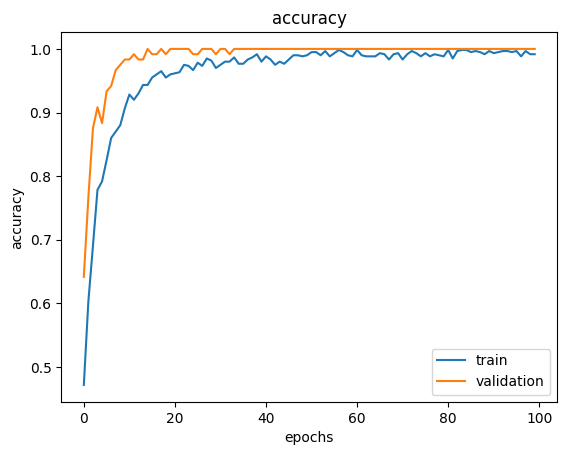

In [48]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

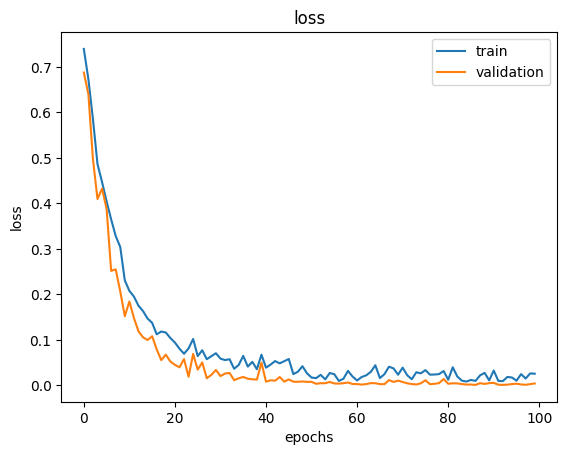

In [49]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])

In [50]:
model.save('csbin_model_v1.keras')

In [51]:
model.evaluate(validate)

4/4 [==============================] - 2s 363ms/step - loss: 0.0041 - accuracy: 1.0000


[0.0040677557699382305, 1.0]

In [52]:
model.evaluate(test)

4/4 [==============================] - 2s 359ms/step - loss: 0.0044 - accuracy: 1.0000


[0.004423963371664286, 1.0]

In [53]:
impotr numpy as np
img, labels = np.array(list(test)[0])
x_out = model.predict(img)


1/1 [==============================] - 1s 513ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

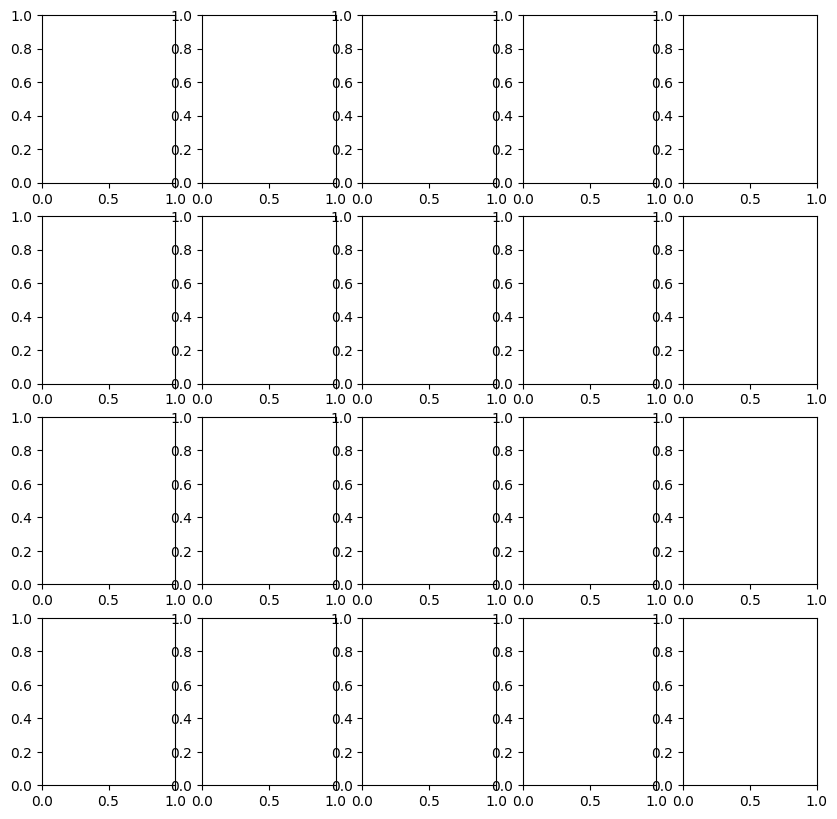

In [54]:
c = 0
fig, axes = plt.subplots(4, 5, figsize=(10, 10))
for i in range(20):
    if x_out[i] >= 0.5 and img[1][i] == 1 or x_out[i] < 0.5 and img[1][i] == 0:
        sign = '+'
        c += 1
    else: sign = '-'
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.imshow(img[0][i].numpy().astype("uint8"))
    ax.axis("off")
    ax.set_title(f"{'ak47' if x_out[i] <= 0.5 else 'awp'} ({sign})", fontsize=12)
plt.tight_layout()
print(c/20*100, '%')

In [ ]:
# # Генерируем описание модели в формате json
# model_json = model.to_json()
# # Записываем модель в файл
# json_file = open("csbin_model_v1.json", "w")
# json_file.write(model_json)
# json_file.close()

In [ ]:
# model.save_weights("csbin_model_v1.weights.h5")